## References

In [2]:
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# https://radimrehurek.com/gensim/models/ldamodel.html

## Prepare Notebook

In [3]:
# import packages
from gensim import models
import pandas as pd
import pickle
import logging
import os
from gensim import corpora, models
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sebastian Birk\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Test Documents

In [5]:
# load district documents for first objective
with open('tokenized_documents_district_pooling.p', 'rb') as fp:
    district_pooling_docs = pickle.load(fp)

# load month documents for second objective
with open('tokenized_documents_month_pooling.p', 'rb') as fp:
    month_pooling_docs = pickle.load(fp)

# load month and district documents for second objective
with open('tokenized_documents_district_per_month_pooling.p', 'rb') as fp:
    district_per_month_pooling_docs = pickle.load(fp)

## Load Model and Dictionary

In [6]:
# load model
lda_model =  models.LdaModel.load('lda.model')

# load dictionary
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   print("Hashtag pooling dictionary loaded!")
else:
   print("Please train LDA model first!")

2018-09-26 16:38:14,058 : INFO : loading LdaModel object from lda.model
2018-09-26 16:38:14,063 : INFO : loading expElogbeta from lda.model.expElogbeta.npy with mmap=None
2018-09-26 16:38:14,069 : INFO : setting ignored attribute dispatcher to None
2018-09-26 16:38:14,071 : INFO : setting ignored attribute id2word to None
2018-09-26 16:38:14,073 : INFO : setting ignored attribute state to None
2018-09-26 16:38:14,075 : INFO : loaded lda.model
2018-09-26 16:38:14,076 : INFO : loading LdaState object from lda.model.state
2018-09-26 16:38:14,084 : INFO : loaded lda.model.state
2018-09-26 16:38:14,093 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-09-26 16:38:14,102 : INFO : loaded tourism_hashtag_pooling.dict


Hashtag pooling dictionary loaded!


## Running Model on Test Documents

In [7]:
# apply model to district pooled documents and get topic probability distributions
district_bow_list = [dictionary.doc2bow(text) for text in district_pooling_docs]
# district_1 = district_bow_list[0]
district_topic_list = []

for index in range(len(district_bow_list)):
    district_bow = district_bow_list[index]
    topic_vector = lda_model[district_bow] # get topic probability distribution for a document
    district_topic_list.append(topic_vector)

In [8]:
# display district topic list
district_topic_list

[[(0, 0.04727041),
  (1, 0.20795411),
  (2, 0.10557274),
  (3, 0.077963635),
  (4, 0.21521024),
  (5, 0.069285311),
  (6, 0.1925519),
  (7, 0.084191695)],
 [(0, 0.053166904),
  (1, 0.10703449),
  (2, 0.065160051),
  (3, 0.038423777),
  (4, 0.068487175),
  (5, 0.055348381),
  (6, 0.55378163),
  (7, 0.058597565)],
 [(0, 0.069797918),
  (1, 0.16301768),
  (2, 0.077833071),
  (3, 0.17151947),
  (4, 0.14911883),
  (5, 0.097291537),
  (6, 0.1844978),
  (7, 0.086923704)],
 [(0, 0.058051869),
  (1, 0.24761981),
  (2, 0.070514642),
  (3, 0.085679673),
  (4, 0.11243522),
  (5, 0.076013856),
  (6, 0.14537925),
  (7, 0.20430568)],
 [(0, 0.080009297),
  (1, 0.15788928),
  (2, 0.099436283),
  (3, 0.064962387),
  (4, 0.13761866),
  (5, 0.10922177),
  (6, 0.23933949),
  (7, 0.11152287)],
 [(0, 0.075109363),
  (1, 0.12771581),
  (2, 0.18137199),
  (3, 0.084710941),
  (4, 0.20841692),
  (5, 0.084128439),
  (6, 0.18610719),
  (7, 0.052439384)],
 [(0, 0.1468025),
  (1, 0.11406162),
  (2, 0.12743127),
  (3

## Extract for Each Topic the Scores of the Districts

In [9]:
topic0 = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []

for district in range(len(district_topic_list)):
    district_dict = dict(district_topic_list[district])
    
    if 0 in district_dict.keys():
        topic0.append(district_dict[0])
    else:
        topic0.append(0)
    
    if 1 in district_dict.keys():
        topic1.append(district_dict[1])
    else:
        topic1.append(0)
    
    if 2 in district_dict.keys():
        topic2.append(district_dict[2])
    else:
        topic2.append(0)
        
    if 3 in district_dict.keys():
        topic3.append(district_dict[3])
    else:
        topic3.append(0)
        
    if 4 in district_dict.keys():
        topic4.append(district_dict[4])
    else:
        topic4.append(0)
        
    if 5 in district_dict.keys():
        topic5.append(district_dict[5])
    else:
        topic5.append(0)
    
    if 6 in district_dict.keys():
        topic6.append(district_dict[6])
    else:
        topic6.append(0)
        
    if 7 in district_dict.keys():
        topic7.append(district_dict[7])
    else:
        topic7.append(0)

In [10]:
# check topic 0 to see whether the output looks as desired
topic0

[0.04727041,
 0.053166904,
 0.069797918,
 0.058051869,
 0.080009297,
 0.075109363,
 0.1468025,
 0.088678338,
 0.056885578,
 0.047781859]

In [13]:
# define function to plot a graph to compare districts for a given topic
def district_bar_graph(districts, indices):
    """
    Function to plot district bar graph.
    
    districts: list with topic scores for each district
    indices: list of district number
    """
    assert len(districts) == len(indices)
    n = len(districts)
    x = np.arange(n)
    plt.figure(figsize=(10,7))
    plt.bar(x, districts, width=0.5, tick_label=indices, align='center')
    plt.xlabel('District')
    plt.ylabel('Topic Score')

## Topic 0: Fitness & Sports

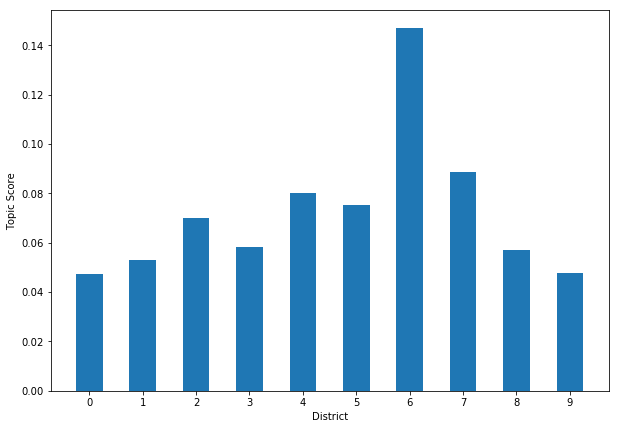

In [14]:
# plot topic scores
district_bar_graph(topic0,
                   list(range(len(topic0))))
plt.show()

## Topic 1: Summer, Sun, Beach

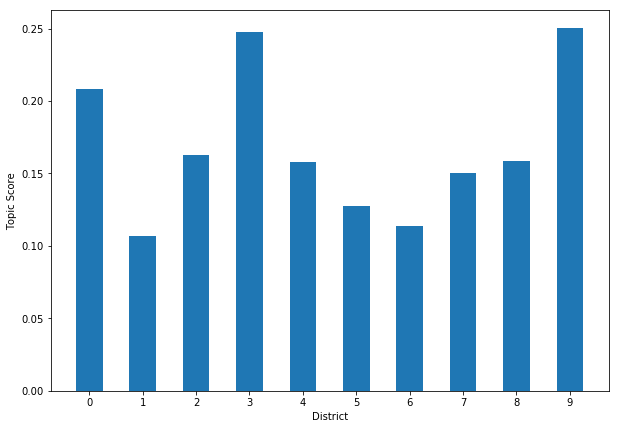

In [15]:
# plot topic scores
district_bar_graph(topic1,
                   list(range(len(topic1))))
plt.show()

## Topic 2: Travel

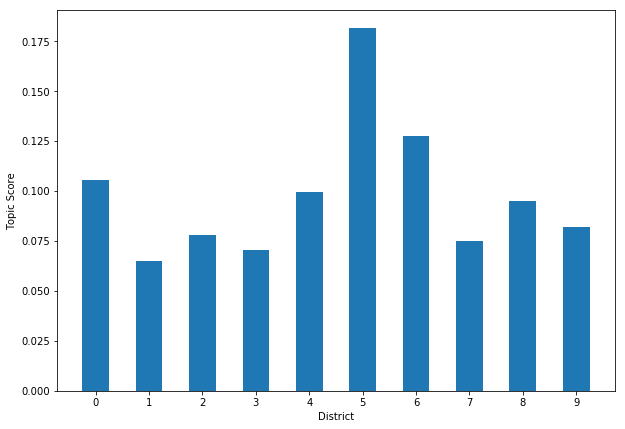

In [16]:
# plot topic scores
district_bar_graph(topic2,
                   list(range(len(topic2))))
plt.show()

## Topic 3: Streetart & Urban Life

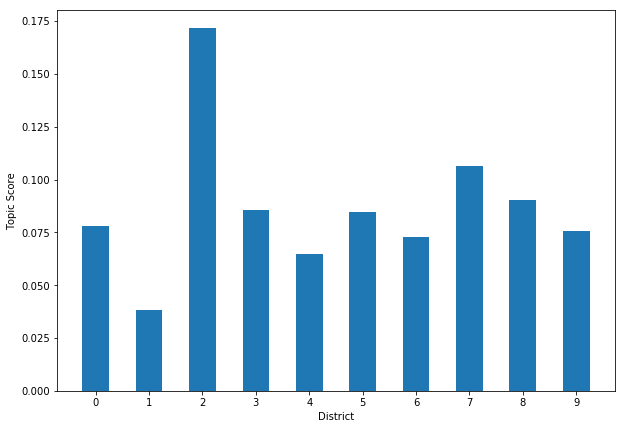

In [17]:
# plot topic scores
district_bar_graph(topic3,
                   list(range(len(topic3))))
plt.show()

## Topic 4: Art

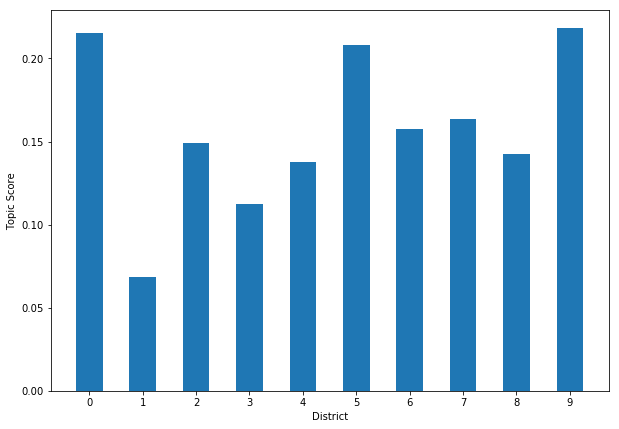

In [18]:
# plot topic scores
district_bar_graph(topic4,
                   list(range(len(topic4))))
plt.show()

## Topic 5: Lifestyle & Other

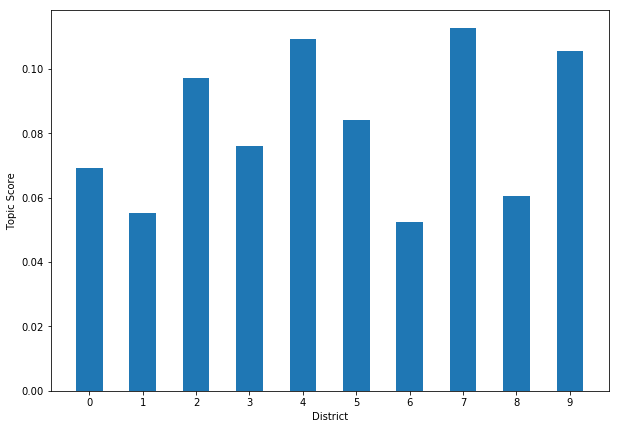

In [19]:
# plot topic scores
district_bar_graph(topic5,
                   list(range(len(topic5))))
plt.show()

## Topic 6: Sightseeing

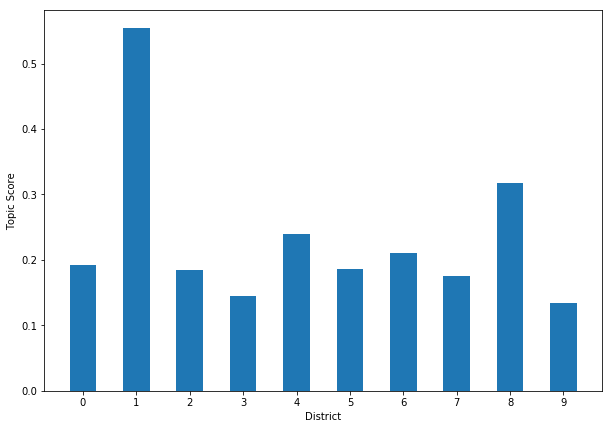

In [20]:
# plot topic scores
district_bar_graph(topic6,
                   list(range(len(topic6))))
plt.show()

## Topic 7: Gastronomy

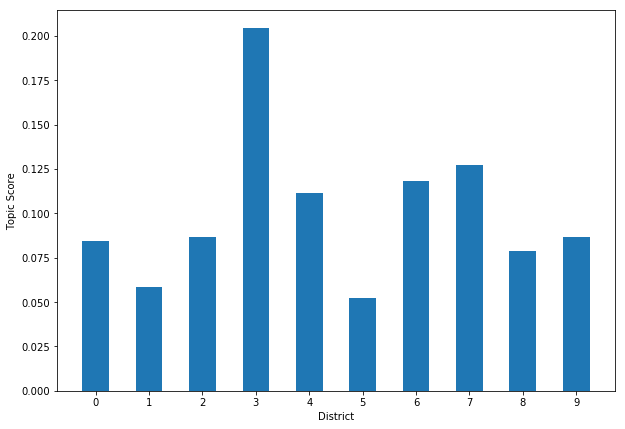

In [21]:
# plot topic scores
district_bar_graph(topic7,
                   list(range(len(topic7))))
plt.show()

In [22]:
# define function to apply the model to unseen documents (similar procedure to above where it was applied to the district docs)
def run_lda_on_test_doc(docs):
    bow_list = [dictionary.doc2bow(text) for text in docs]
    topic_list = []
    
    for index in range(len(bow_list)):
        bow = bow_list[index]
        topic_vector = lda_model[bow]
        topic_list.append(topic_vector)
        
    return topic_list

In [23]:
topics_month = run_lda_on_test_doc(month_pooling_docs)
topics_district_per_month = run_lda_on_test_doc(district_per_month_pooling_docs)